Import modules and libraries

In [25]:
import sys
sys.path.append("..")

from data import generate_synthetic, visualise, evaluate
from src import linear_regression

We start by generating some relatively linear data

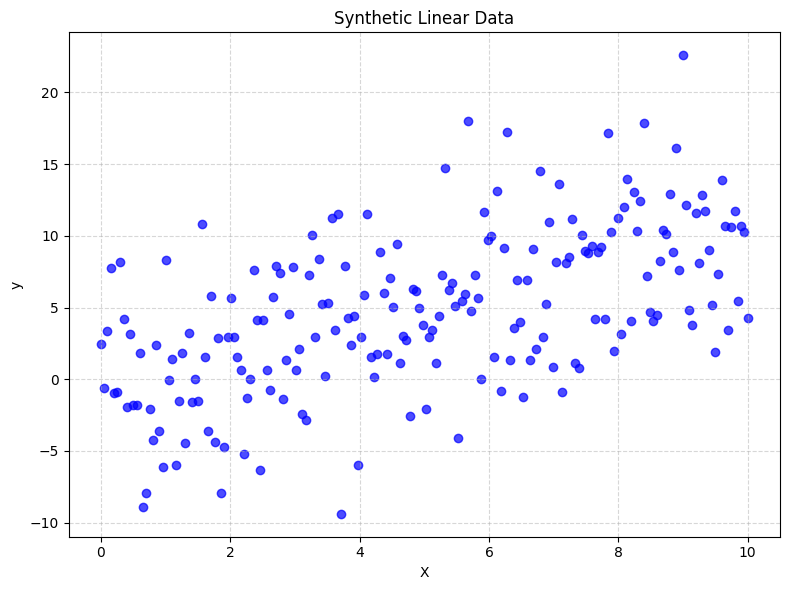

In [26]:
X, y = generate_synthetic.generate_linear_data(n_samples=200, noise=5)
visualise.plot_data(X, y)

Then we derive the parameter value Theta

In [27]:
theta = linear_regression.find_theta_linear(X, y)
print(f'Parameter theta: {round(theta, 5)}')
predictions = linear_regression.predict(X, theta)

Parameter theta: 0.99821


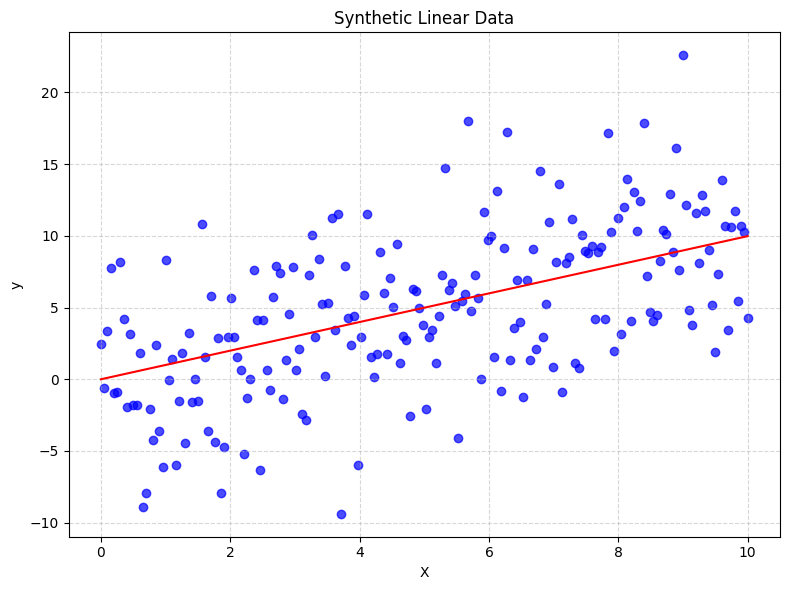

In [28]:
visualise.plot_data(X, y, [predictions])

In [29]:
rmse = evaluate.evaluate_rmse(y, predictions)
print(f'RMSE: {round(rmse, 2)}')

RMSE: 4.65


Increasing the accuracy of the model by adding a y-intercept component

In [30]:
params = linear_regression.find_theta_multinomial(X, y, N=1)
print(f'Parameter list: {params}')
predictions2 = linear_regression.predict(X, params)

Parameter list: [-0.77387387  1.11400381]


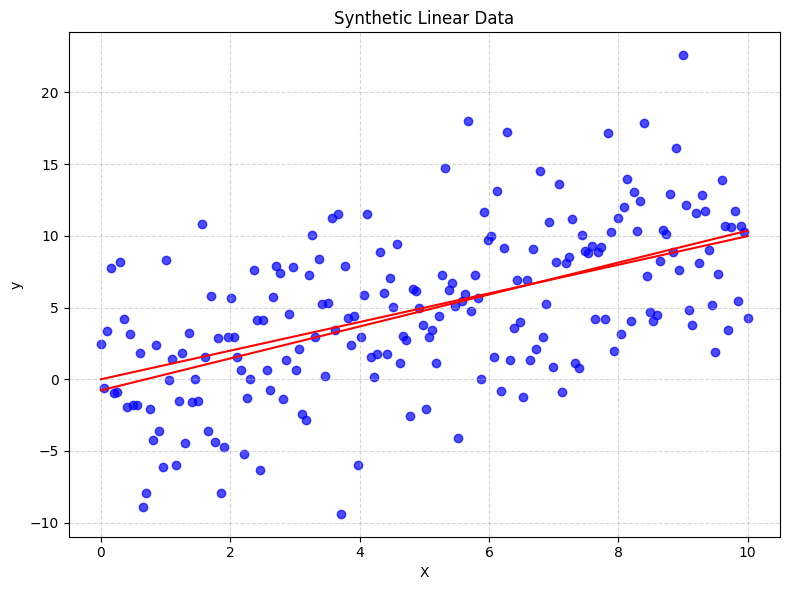

In [31]:
visualise.plot_data(X, y, [predictions, predictions2])

In [34]:
new_rmse = evaluate.evaluate_rmse(y, predictions2)
print(f'Old RMSE: {round(rmse, 3)}. New RMSE: {round(new_rmse, 3)}.')

Old RMSE: 4.648. New RMSE: 4.632.


How does this scale to other patterns of data

In [35]:
X_q, y_q = generate_synthetic.generate_quadratic_data(n_samples=50, noise=10)

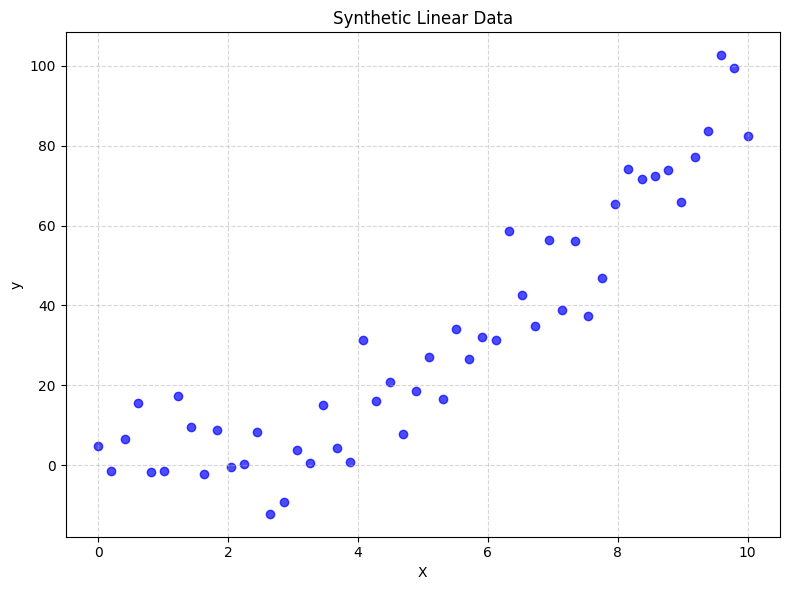

In [36]:
visualise.plot_data(X_q, y_q)

In [37]:
params_deg1 = linear_regression.find_theta_multinomial(X_q, y_q, 1)
params_deg2 = linear_regression.find_theta_multinomial(X_q, y_q, 2)
params_deg4 = linear_regression.find_theta_multinomial(X_q, y_q, 4)

pred_deg1 = linear_regression.predict(X_q, params_deg1)
pred_deg2 = linear_regression.predict(X_q, params_deg2)
pred_deg4 = linear_regression.predict(X_q, params_deg4)

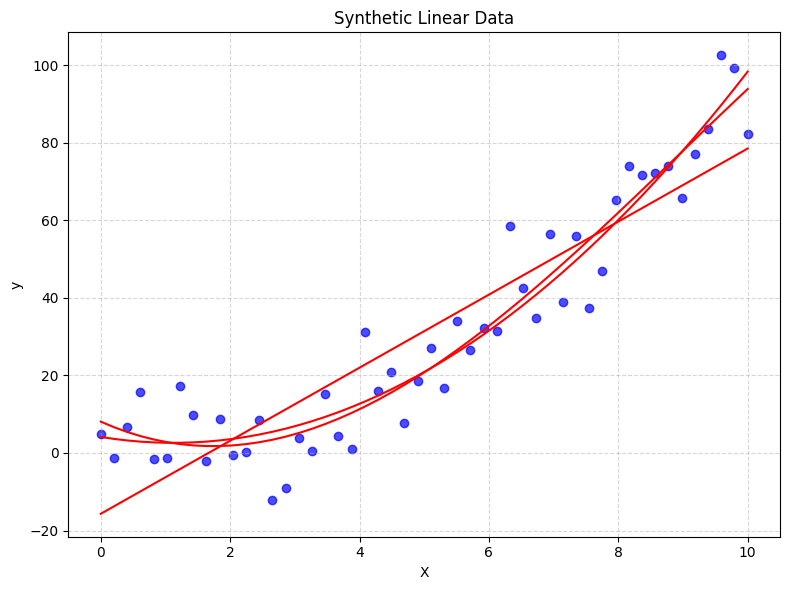

In [38]:
visualise.plot_data(X_q, y_q, [pred_deg1, pred_deg2, pred_deg4])

In [40]:

rmse_deg1 = evaluate.evaluate_rmse(y_q, pred_deg1)
rmse_deg2 = evaluate.evaluate_rmse(y_q, pred_deg2)
rmse_deg4 = evaluate.evaluate_rmse(y_q, pred_deg4)

print(
    'RMSE results', 
    f'LINEAR: {round(rmse_deg1, 3)}, QUADRATIC: {round(rmse_deg2, 3)}, QUARTIC: {round(rmse_deg4, 3)}',
    sep='\n'
)

RMSE results
LINEAR: 12.976, QUADRATIC: 8.931, QUARTIC: 8.747
